In [26]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
df

Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]

In [27]:
# x:input
x = df.loc[:,"Gender":"EstimatedSalary"]
print(x)
# y:output
y = df.loc[:,["Purchased"]] 
print(y)

     Gender  Age  EstimatedSalary
0      Male   19            19000
1      Male   35            20000
2    Female   26            43000
3    Female   27            57000
4      Male   19            76000
..      ...  ...              ...
395  Female   46            41000
396    Male   51            23000
397  Female   50            20000
398    Male   36            33000
399  Female   49            36000

[400 rows x 3 columns]
     Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

     Gender  Age  EstimatedSalary
370  Female   60            46000
287  Female   48           138000
358    Male   40            71000
295  Female   36            63000
88     Male   26            81000
..      ...  ...              ...
255  Female   52            90000
72   Female   20            23000
396    Male   51            23000
235    Male   46            79000
37     Male   30            49000

[268 rows x 3 columns]
     Purchased
370          1
287          1
358          1
295          0
88           0
..         ...
255          1
72           0
396          1
235          1
37           0

[268 rows x 1 columns]
     Gender  Age  EstimatedSalary
398    Male   36            33000
125  Female   39            61000
328    Male   36           118000
339    Male   39           122000
172  Female   26           118000
..      ...  ...              ...
12     Male   20            86000
309  Female   38            50000
399  Female   49            36000
333    Male   40        

In [29]:
# 檢查是否為數字
import re
def is_number(num):
  pattern = re.compile(r'^[-+]?[-0-9]\d*\.\d*|[-+]?\.?[0-9]\d*$')
  result = pattern.match(num)
  if result:
    return True
  else:
    return False

# Preprocessing
from sklearn import preprocessing
# 將nominal屬性轉為數字label，因為sklearn.naive_bayes.GaussianNB不接受nominal的input
le = preprocessing.LabelEncoder()


# 儲存編碼後的input
X_train_encoded = []
X_test_encoded = []

# 將input進行編碼，只有nominal需要編碼
for col_name in x:
    data = str(x[col_name][0]) # 先暫時轉為string，為了檢察是否為數字
    
    if(is_number(data) == False): # 若不是數字，代表為nominal
        encoded_train = le.fit_transform(x_train[col_name]) # 將各col的value轉成數字
        encoded_test = le.fit_transform(x_test[col_name]) # 將各col的value轉成數字
        X_train_encoded.append(encoded_train)
        X_test_encoded.append(encoded_test)
    else:
        X_train_encoded.append(x_train[col_name]) # 不用編碼直接放入list
        X_test_encoded.append(x_test[col_name])
       
# print(X_encoded)

In [30]:
# 將input組合起來
x_train =list(zip(X_train_encoded[0], X_train_encoded[1], X_train_encoded[2]))
x_test = list(zip(X_test_encoded[0], X_test_encoded[1], X_test_encoded[2]))

# 轉成array
import numpy as np
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

print(x_train)
print(x_test)

[[     0     60  46000]
 [     0     48 138000]
 [     1     40  71000]
 [     0     36  63000]
 [     1     26  81000]
 [     1     33  31000]
 [     0     41  51000]
 [     0     46  74000]
 [     1     18  82000]
 [     0     37  33000]
 [     1     35  53000]
 [     0     28  59000]
 [     0     37  71000]
 [     0     18  44000]
 [     1     38  61000]
 [     0     35  65000]
 [     1     31  66000]
 [     1     47  25000]
 [     1     42 104000]
 [     1     19  19000]
 [     1     21  72000]
 [     1     28  32000]
 [     1     52 150000]
 [     0     53 104000]
 [     1     25  80000]
 [     0     26  72000]
 [     0     26  15000]
 [     0     40 142000]
 [     1     35  38000]
 [     0     57 122000]
 [     1     41  87000]
 [     0     24  89000]
 [     1     37  52000]
 [     1     35 108000]
 [     1     32 100000]
 [     0     35 147000]
 [     0     19  26000]
 [     0     46  82000]
 [     1     47 105000]
 [     0     45  45000]
 [     1     38  51000]
 [     0     37 

In [31]:
#Import Gaussian Naive Bayes 模型 (高斯樸素貝氏)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# 訓練集訓練模型
# model.fit(x, y)
model.fit(x_train, y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
# 用testing data去預測
predicted = model.predict(x_test) # 代表預測的答案
expected = y_test # 代表真正的答案

# print(expected, type(expected))
# print(predicted, type(predicted))

from sklearn import metrics

def TP_Rate(confusion_matrix_2D, class_label):
    return confusion_matrix_2D[0][class_label]/(confusion_matrix_2D[0][0] + confusion_matrix_2D[0][1])

def FP_Rate(confusion_matrix_2D, class_label):
    return confusion_matrix_2D[1][class_label]/(confusion_matrix_2D[1][0] + confusion_matrix_2D[1][1])

confusion_matrix_2D = metrics.confusion_matrix(expected, predicted)
print("準確率:", model.score(x_test, y_test))
print("For purchase = 0:")
print("TP Rate:", TP_Rate(confusion_matrix_2D, 0))
print("FP Rate:", FP_Rate(confusion_matrix_2D, 0))
print()
print("For purchase = 1:")
print("TP Rate:", TP_Rate(confusion_matrix_2D, 1))
print("FP Rate:", FP_Rate(confusion_matrix_2D, 1))
print()
print("Confusion Matrix:")
print(metrics.confusion_matrix(expected, predicted))

準確率: 0.8333333333333334
For purchase = 0:
TP Rate: 0.8641975308641975
FP Rate: 0.21568627450980393

For purchase = 1:
TP Rate: 0.13580246913580246
FP Rate: 0.7843137254901961

Confusion Matrix:
[[70 11]
 [11 40]]


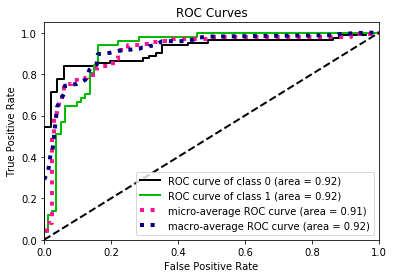

In [39]:
import scikitplot as skplt
import matplotlib.pyplot as plt
y_probas = model.predict_proba(x_test)

skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

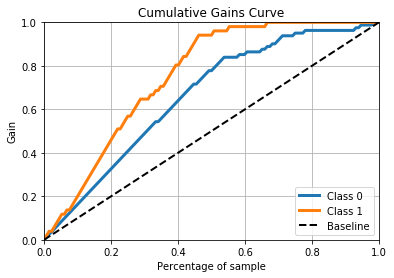

In [40]:
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

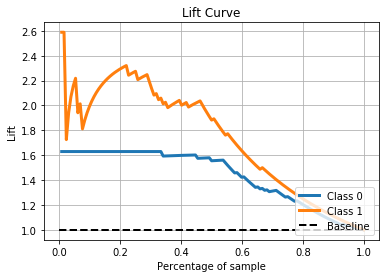

In [41]:
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()